### Import, mount, and configure

In [3]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn
import sklearn
import statsmodels
import tqdm
from google.colab import drive

In [4]:
drive.mount('/content/drive')

DRIVE_ROOT = Path('/content/drive/MyDrive')

PROJECT_ROOT = DRIVE_ROOT / 'projects/btc'
PROJECT_DATA_DIR = PROJECT_ROOT / 'data'
PROJECT_CLEANED_DIR = PROJECT_DATA_DIR / 'cleaned'

BTC_CLEANED_CSV_FILENAME = 'btc_274_cleaned.csv'

BTC_CLEANED_FILEPATH = PROJECT_CLEANED_DIR / BTC_CLEANED_CSV_FILENAME

Mounted at /content/drive


In [5]:
if 'google.colab' in sys.modules:
    %pip install -q -U keras_tuner

import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.3 MB/s eta 0:00:00


In [6]:
project_root = os.path.abspath(PROJECT_ROOT)

if project_root not in sys.path:
  sys.path.append(project_root)

print(f'Project root "{project_root}" added to sys.path.')

Project root "/content/drive/MyDrive/projects/btc" added to sys.path.


In [8]:
from src.analysis import *
from src.data_loader import *
from src.data_splitter import *
from src.model import *
from src.preprocessing import *
from src.utils import *
from src.visualization import *

In [7]:
print('--- Python Interpreter and Standard Library Versions ---')
print(f'Python Version: {sys.version}')
print(f'Python Version Info: {sys.version_info.major}.{sys.version_info.minor}.{sys.version_info.micro}')

print(f'os, shutil, hashlib, pathlib module: (version tied to Python interpreter)')

print('\n--- Third-Party Library Versions ---')
print(f'Pandas Version: {pd.__version__}')
print(f'NumPy Version: {np.__version__}')
print(f'Matplotlib Version: {matplotlib.__version__}')
print(f'Seaborn Version: {seaborn.__version__}')
print(f'Sklearn Version: {sklearn.__version__}')
print(f'Statsmodels Version: {statsmodels.__version__}')
#print(f'Tqdm Version: {tqdm.version.__version__}')

print('\n--- Google Colab Specific Module Versions ---')
print(f'google.colab.drive: (version tied to Colab environment)')

--- Python Interpreter and Standard Library Versions ---
Python Version: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
Python Version Info: 3.11.13
os, shutil, hashlib, pathlib module: (version tied to Python interpreter)

--- Third-Party Library Versions ---
Pandas Version: 2.2.2
NumPy Version: 2.0.2
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
Sklearn Version: 1.6.1
Statsmodels Version: 0.14.5

--- Google Colab Specific Module Versions ---
google.colab.drive: (version tied to Colab environment)


### Load the cleaned dataset, and resample it

In [9]:
df_btc_cleaned = load_btc_dataset(BTC_CLEANED_FILEPATH, 'date', True)
btc_resampled = resample_btc_data(df_btc_cleaned)


Loading dataset from: btc_274_cleaned.csv...
Dataset loaded successfully.

--- Resampling BTC Data to Multiple Timeframes ---
Resampling to hourly frequency...
Resampling to daily frequency...
Resampling to weekly frequency...
Resampling to monthly frequency...
--- BTC Data Resampling Complete ---


### Split the resampled datasets into a training set, a validation set, and a test set of respective timeframe, and take logs and differencing

In [10]:
for df_btc_resampled in btc_resampled.values():
    df_btc_resampled = calculate_log_and_diff(df_btc_resampled, 'close')

In [11]:
df_btc_daily_train, df_btc_daily_valid, df_btc_daily_test = split_btc_dataset(btc_resampled['daily'], 'Day')
df_btc_weekly_train, df_btc_weekly_valid, df_btc_weekly_test = split_btc_dataset(btc_resampled['weekly'], 'Week')


--- Splitting BTC Dataset to Training, Validation, and Test Set (Day) ---
--- BTC Dataset Splitting Complete ---

--- Splitting BTC Dataset to Training, Validation, and Test Set (Week) ---
--- BTC Dataset Splitting Complete ---


### Run the ADF test on datasets at multiple frequencies to verify stationarity and seasonality

In [ ]:
run_adf_test(df_btc_daily_train, 'log_returns_close', 'BTC Daily Closing Log Returns')
run_adf_test(df_btc_weekly_train, 'log_returns_close', 'BTC Weekly Closing Log Returns')

= ADF Test: BTC Daily Closing Log Returns =
ADF Statistics: -10.8444
p-value: 0.0000
Critical Values:
	1%:-3.4320
	5%:-2.8623
	10%:-2.5672
Conclusion: The p-value is less than or equal to 0.05. The data is likely stationary and seasonal.

= ADF Test: BTC Weekly Closing Log Returns =
ADF Statistics: -11.5296
p-value: 0.0000
Critical Values:
	1%:-3.4421
	5%:-2.8667
	10%:-2.5695
Conclusion: The p-value is less than or equal to 0.05. The data is likely stationary and seasonal.



### Time-Series decomposition and Autocorrelation Analysis
*   Perform time series decomposition plots across various timeframes to detect seasonality.
*   Check for daily, weekly, monthly, and yearly seasonality using the raw closing price at hourly, daily, and weekly frequencies.
*   Identify if yearly seasonality persists after log-differencing the data at multiple frequencies.
*   Plot ACF/PACF graphs of the log-differenced time series to confirm whether additional differencing is required.

In [ ]:
plot_time_series_decomposition(df_btc_daily_train, 'close', 'multiplicative', 7, 'BTC Weekly Seasonality (Closing Price - Daily Resampled)', 'btc_weekly_seasonality_daily_price_decomposition.png')
plot_time_series_decomposition(df_btc_daily_train, 'close', 'multiplicative', 30, 'BTC Monthly Seasonality (Closing Price - Daily Resampled)', 'btc_monthly_seasonality_daily_price_decomposition.png')
plot_time_series_decomposition(df_btc_daily_train, 'close', 'multiplicative', 365, 'BTC Yearly Seasonality (Closing Price - Daily Resampled)', 'btc_yearly_seasonality_daily_price_decomposition.png')

plot_time_series_decomposition(df_btc_weekly_train, 'close', 'multiplicative', 4, 'BTC Monthly Seasonality (Closing Price - Weekly Resampled)', 'btc_monthly_seasonality_weekly_price_decomposition.png')
plot_time_series_decomposition(df_btc_weekly_train, 'close', 'multiplicative', 52, 'BTC Yearly Seasonality (Closing Price - Weekly Resampled)', 'btc_yearly_seasonality_weekly_price_decomposition.png')

plot_time_series_decomposition(df_btc_daily_train.dropna(), 'log_returns_close', 'additive', 365, 'BTC Yearly Seasonality (Closing Log Returns - Daily Resampled)', 'btc_yearly_seasonality_daily_log_returns_decomposition.png' )
plot_time_series_decomposition(df_btc_weekly_train.dropna(), 'log_returns_close', 'additive', 52, 'BTC Yearly Seasonality (Closing Log Returns) - Weekly Resampled)', 'btc_yearly_seasonality_weekly_log_returns_decomposition.png' )

plot_autocorrelation(df_btc_daily_train, 'log_returns_close', 400, 'BTC Daily Closing Log Returns', 'daily_log_returns_autocorrelation')
plot_autocorrelation(df_btc_weekly_train, 'log_returns_close', 100, 'BTC Weekly Closing Log Returns', 'weekly_log_returns_autocorrelation')

Plot saved to "outputs/plots/btc_weekly_seasonality_daily_price_decomposition.png".
Plot saved to "outputs/plots/btc_monthly_seasonality_daily_price_decomposition.png".
Plot saved to "outputs/plots/btc_yearly_seasonality_daily_price_decomposition.png".
Plot saved to "outputs/plots/btc_monthly_seasonality_weekly_price_decomposition.png".
Plot saved to "outputs/plots/btc_yearly_seasonality_weekly_price_decomposition.png".
Plot saved to "outputs/plots/btc_yearly_seasonality_daily_log_returns_decomposition.png".
Plot saved to "outputs/plots/btc_yearly_seasonality_weekly_log_returns_decomposition.png".
Plot saved to "outputs/plots/daily_log_returns_autocorrelation_autocorrelation.png".
Plot saved to "outputs/plots/weekly_log_returns_autocorrelation_autocorrelation.png".


### ARIMA Model Evaluation and Final Forecast (1-Month)

In [12]:
naive_metrics, naive_pred = run_naive_model(df_btc_daily_valid, 'close', 30, 'Days', 'Validation')

= Naive Model Evaluation on Validation Set (Horizon: 30 Days) =
--- Skipping Naive Model Fitting ---

--- Evaluating Naive Model ---
- Mean Absolute Percentage Error (MAPE): 10.5643%
- Directional Accuracy (DA): 54.8611%

--- Generating Final Naive Forecast ---
- Forecast for 2024-03-15: $51475.00


In [ ]:
p_values = range(0, 6)
d_values = [1]
q_values = range(0, 6)

arima_metrics, arima_pred = run_arima_model(df_btc_daily_train, df_btc_daily_valid, df_btc_daily_test,
                                            'close', 30, 'Days', 'Validation',
                                            p_values, d_values, q_values,
                                            10, naive_metrics)

= ARIMA Model Evaluation on Validation Set (Horizon: 30 Days) =
Starting ARIMA grid search for 36 combinations...



ARIMA Grid Search Progress:   3%|▎         | 1/36 [00:04<02:40,  4.59s/it]

Order: (0, 1, 0), MAPE: 11.8501%, DA: 48.7013%


ARIMA Grid Search Progress:   6%|▌         | 2/36 [00:31<10:00, 17.66s/it]

Order: (0, 1, 1), MAPE: 11.8563%, DA: 48.2684%


ARIMA Grid Search Progress:   8%|▊         | 3/36 [01:17<16:51, 30.66s/it]

Order: (0, 1, 2), MAPE: 11.8642%, DA: 48.0519%


ARIMA Grid Search Progress:  11%|█         | 4/36 [02:08<20:35, 38.61s/it]

Order: (0, 1, 3), MAPE: 11.8688%, DA: 47.4026%


ARIMA Grid Search Progress:  14%|█▍        | 5/36 [04:03<34:16, 66.33s/it]

Order: (0, 1, 4), MAPE: 11.8629%, DA: 47.6190%


ARIMA Grid Search Progress:  17%|█▋        | 6/36 [06:33<47:17, 94.57s/it]

Order: (0, 1, 5), MAPE: 11.8394%, DA: 49.1342%


ARIMA Grid Search Progress:  19%|█▉        | 7/36 [06:40<31:51, 65.90s/it]

Order: (1, 1, 0), MAPE: 11.8554%, DA: 48.2684%


ARIMA Grid Search Progress:  22%|██▏       | 8/36 [07:56<32:22, 69.38s/it]

Order: (1, 1, 1), MAPE: 11.8700%, DA: 47.8355%


ARIMA Grid Search Progress:  25%|██▌       | 9/36 [09:37<35:37, 79.17s/it]

Order: (1, 1, 2), MAPE: 11.8677%, DA: 47.1861%


ARIMA Grid Search Progress:  28%|██▊       | 10/36 [11:20<37:27, 86.44s/it]

Order: (1, 1, 3), MAPE: 11.8671%, DA: 47.1861%


ARIMA Grid Search Progress:  31%|███       | 11/36 [15:19<55:31, 133.26s/it]

Order: (1, 1, 4), MAPE: 11.8371%, DA: 48.7013%


ARIMA Grid Search Progress:  33%|███▎      | 12/36 [20:07<1:12:02, 180.11s/it]

Order: (1, 1, 5), MAPE: 11.8385%, DA: 49.7835%


ARIMA Grid Search Progress:  36%|███▌      | 13/36 [20:43<52:19, 136.52s/it]  

Order: (2, 1, 0), MAPE: 11.8636%, DA: 48.2684%


ARIMA Grid Search Progress:  39%|███▉      | 14/36 [22:33<47:07, 128.51s/it]

Order: (2, 1, 1), MAPE: 11.8694%, DA: 47.4026%


ARIMA Grid Search Progress:  42%|████▏     | 15/36 [26:06<53:58, 154.20s/it]

Order: (2, 1, 2), MAPE: 11.8528%, DA: 48.9177%


ARIMA Grid Search Progress:  44%|████▍     | 16/36 [30:17<1:01:01, 183.10s/it]

Order: (2, 1, 3), MAPE: 11.8617%, DA: 50.0000%


ARIMA Grid Search Progress:  47%|████▋     | 17/36 [35:06<1:08:03, 214.93s/it]

Order: (2, 1, 4), MAPE: 11.8131%, DA: 50.0000%


ARIMA Grid Search Progress:  50%|█████     | 18/36 [40:56<1:16:43, 255.76s/it]

Order: (2, 1, 5), MAPE: 11.8397%, DA: 50.4329%


ARIMA Grid Search Progress:  53%|█████▎    | 19/36 [41:44<54:44, 193.21s/it]  

Order: (3, 1, 0), MAPE: 11.8727%, DA: 48.0519%


ARIMA Grid Search Progress:  56%|█████▌    | 20/36 [42:44<40:51, 153.22s/it]

Order: (3, 1, 1), MAPE: 11.8725%, DA: 48.0519%


ARIMA Grid Search Progress:  58%|█████▊    | 21/36 [46:33<44:01, 176.11s/it]

Order: (3, 1, 2), MAPE: 11.8455%, DA: 50.6494%


ARIMA Grid Search Progress:  61%|██████    | 22/36 [51:09<48:03, 205.98s/it]

Order: (3, 1, 3), MAPE: 11.8617%, DA: 50.0000%


ARIMA Grid Search Progress:  64%|██████▍   | 23/36 [56:30<52:05, 240.43s/it]

Order: (3, 1, 4), MAPE: 11.8713%, DA: 49.1342%


ARIMA Grid Search Progress:  67%|██████▋   | 24/36 [1:02:43<56:03, 280.28s/it]

Order: (3, 1, 5), MAPE: 11.8328%, DA: 50.4329%


ARIMA Grid Search Progress:  69%|██████▉   | 25/36 [1:03:12<37:34, 204.97s/it]

Order: (4, 1, 0), MAPE: 11.8683%, DA: 48.2684%


ARIMA Grid Search Progress:  72%|███████▏  | 26/36 [1:05:15<30:04, 180.40s/it]

Order: (4, 1, 1), MAPE: 12.0432%, DA: 46.9697%


ARIMA Grid Search Progress:  75%|███████▌  | 27/36 [1:09:46<31:07, 207.55s/it]

Order: (4, 1, 2), MAPE: 11.8636%, DA: 49.5671%


ARIMA Grid Search Progress:  78%|███████▊  | 28/36 [1:14:51<31:33, 236.74s/it]

Order: (4, 1, 3), MAPE: 11.8550%, DA: 49.5671%


ARIMA Grid Search Progress:  81%|████████  | 29/36 [1:20:39<31:30, 270.10s/it]

Order: (4, 1, 4), MAPE: 11.8726%, DA: 48.7013%


ARIMA Grid Search Progress:  83%|████████▎ | 30/36 [1:27:23<31:00, 310.12s/it]

Order: (4, 1, 5), MAPE: 11.8494%, DA: 49.5671%


ARIMA Grid Search Progress:  86%|████████▌ | 31/36 [1:27:52<18:49, 225.81s/it]

Order: (5, 1, 0), MAPE: 11.8547%, DA: 48.7013%


ARIMA Grid Search Progress:  89%|████████▉ | 32/36 [1:32:06<15:37, 234.43s/it]

Order: (5, 1, 1), MAPE: 11.8544%, DA: 49.5671%


ARIMA Grid Search Progress:  92%|█████████▏| 33/36 [1:37:12<12:47, 255.78s/it]

Order: (5, 1, 2), MAPE: 11.8401%, DA: 50.4329%


ARIMA Grid Search Progress:  94%|█████████▍| 34/36 [1:43:06<09:30, 285.17s/it]

Order: (5, 1, 3), MAPE: 11.8480%, DA: 50.0000%


ARIMA Grid Search Progress:  97%|█████████▋| 35/36 [1:49:26<05:13, 313.61s/it]

Order: (5, 1, 4), MAPE: 11.8375%, DA: 50.4329%


ARIMA Grid Search Progress: 100%|██████████| 36/36 [1:56:48<00:00, 194.67s/it]

Order: (5, 1, 5), MAPE: 11.8498%, DA: 49.3506%

ARIMA grid search complete.

--- Selecting Best ARIMA Model ---
Naive Model Benchmark: MAPE: 10.5643%, DA: 54.8611%

Conclusion: No ARIMA model outperformed the naive model.

No best ARIMA model


In [15]:
naive_metrics, naive_pred = run_naive_model(df_btc_daily_test, 'close', 30, 'Days', 'Test')

= Naive Model Evaluation on Test Set (Horizon: 30 Days) =
--- Skipping Naive Model Fitting ---

--- Evaluating Naive Model ---
- Mean Absolute Percentage Error (MAPE): 9.8882%
- Directional Accuracy (DA): 42.0323%

--- Generating Final Naive Forecast ---
- Forecast for 2025-07-22: $102958.00


### ARIMA Model Evaluation and Final Forecast (1-Year)

In [16]:
naive_metrics, naive_pred = run_naive_model(df_btc_weekly_valid, 'close', 52, 'Weeks', 'Validation')

= Naive Model Evaluation on Validation Set (Horizon: 52 Weeks) =
--- Skipping Naive Model Fitting ---

--- Evaluating Naive Model ---
- Mean Absolute Percentage Error (MAPE): 50.6933%
- Directional Accuracy (DA): 0.0000%

--- Generating Final Naive Forecast ---
- Forecast for 2025-02-09: $48295.00


In [17]:
p_values = range(0, 4)
d_values = [1]
q_values = range(0, 4)

arima_metrics, arima_pred = run_arima_model(df_btc_weekly_train, df_btc_weekly_valid, df_btc_weekly_test,
                                            'close', 52, 'Weeks', 'Validation',
                                            p_values, d_values, q_values,
                                            4, naive_metrics)

= ARIMA Model Evaluation on Validation Set (Horizon: 52 Weeks) =
Starting ARIMA grid search for 16 combinations...



ARIMA Grid Search Progress:   6%|▋         | 1/16 [00:00<00:04,  3.29it/s]

Order: (0, 1, 0), MAPE: 50.3980%, DA: 55.5556%


ARIMA Grid Search Progress:  12%|█▎        | 2/16 [00:00<00:05,  2.35it/s]

Order: (0, 1, 1), MAPE: 50.3653%, DA: 55.5556%


ARIMA Grid Search Progress:  19%|█▉        | 3/16 [00:01<00:08,  1.56it/s]

Order: (0, 1, 2), MAPE: 50.0498%, DA: 66.6667%


ARIMA Grid Search Progress:  25%|██▌       | 4/16 [00:02<00:09,  1.23it/s]

Order: (0, 1, 3), MAPE: 49.8141%, DA: 66.6667%


ARIMA Grid Search Progress:  31%|███▏      | 5/16 [00:03<00:08,  1.35it/s]

Order: (1, 1, 0), MAPE: 50.3522%, DA: 55.5556%


ARIMA Grid Search Progress:  38%|███▊      | 6/16 [00:05<00:11,  1.18s/it]

Order: (1, 1, 1), MAPE: 50.4460%, DA: 33.3333%


ARIMA Grid Search Progress:  44%|████▍     | 7/16 [00:10<00:22,  2.55s/it]

Order: (1, 1, 2), MAPE: 49.7383%, DA: 33.3333%


ARIMA Grid Search Progress:  50%|█████     | 8/16 [00:13<00:21,  2.72s/it]

Order: (1, 1, 3), MAPE: 49.9296%, DA: 33.3333%


ARIMA Grid Search Progress:  56%|█████▋    | 9/16 [00:14<00:14,  2.07s/it]

Order: (2, 1, 0), MAPE: 49.9936%, DA: 61.1111%


ARIMA Grid Search Progress:  62%|██████▎   | 10/16 [00:16<00:11,  1.92s/it]

Order: (2, 1, 1), MAPE: 49.7568%, DA: 33.3333%


ARIMA Grid Search Progress:  69%|██████▉   | 11/16 [00:19<00:11,  2.36s/it]

Order: (2, 1, 2), MAPE: 49.7838%, DA: 33.3333%


ARIMA Grid Search Progress:  75%|███████▌  | 12/16 [00:26<00:14,  3.73s/it]

Order: (2, 1, 3), MAPE: 49.7339%, DA: 33.3333%


ARIMA Grid Search Progress:  81%|████████▏ | 13/16 [00:27<00:08,  2.85s/it]

Order: (3, 1, 0), MAPE: 49.6551%, DA: 66.6667%


ARIMA Grid Search Progress:  88%|████████▊ | 14/16 [00:28<00:04,  2.32s/it]

Order: (3, 1, 1), MAPE: 49.6553%, DA: 66.6667%


ARIMA Grid Search Progress:  94%|█████████▍| 15/16 [00:31<00:02,  2.70s/it]

Order: (3, 1, 2), MAPE: 49.6657%, DA: 33.3333%


ARIMA Grid Search Progress: 100%|██████████| 16/16 [00:43<00:00,  2.70s/it]


Order: (3, 1, 3), MAPE: 50.6456%, DA: 33.3333%

ARIMA grid search complete.

--- Selecting Best ARIMA Model ---
Naive Model Benchmark: MAPE: 50.6933%, DA: 0.0000%

Found 16 candidate model(s) that beat the naive model:
- Model: (3, 1, 0), MAPE: 49.6551%, DA: 66.6667%
- Model: (3, 1, 1), MAPE: 49.6553%, DA: 66.6667%
- Model: (3, 1, 2), MAPE: 49.6657%, DA: 33.3333%
- Model: (2, 1, 3), MAPE: 49.7339%, DA: 33.3333%
- Model: (1, 1, 2), MAPE: 49.7383%, DA: 33.3333%
- Model: (2, 1, 1), MAPE: 49.7568%, DA: 33.3333%
- Model: (2, 1, 2), MAPE: 49.7838%, DA: 33.3333%
- Model: (0, 1, 3), MAPE: 49.8141%, DA: 66.6667%
- Model: (1, 1, 3), MAPE: 49.9296%, DA: 33.3333%
- Model: (2, 1, 0), MAPE: 49.9936%, DA: 61.1111%
- Model: (0, 1, 2), MAPE: 50.0498%, DA: 66.6667%
- Model: (1, 1, 0), MAPE: 50.3522%, DA: 55.5556%
- Model: (0, 1, 1), MAPE: 50.3653%, DA: 55.5556%
- Model: (0, 1, 0), MAPE: 50.3980%, DA: 55.5556%
- Model: (1, 1, 1), MAPE: 50.4460%, DA: 33.3333%
- Model: (3, 1, 3), MAPE: 50.6456%, DA: 33.333

In [18]:
naive_metrics, naive_pred = run_naive_model(df_btc_weekly_test, 'close', 52, 'Weeks', 'Test')

= Naive Model Evaluation on Test Set (Horizon: 52 Weeks) =
--- Skipping Naive Model Fitting ---

--- Evaluating Naive Model ---
- Mean Absolute Percentage Error (MAPE): 30.4386%
- Directional Accuracy (DA): 0.0000%

--- Generating Final Naive Forecast ---
- Forecast for 2026-06-21: $102958.00


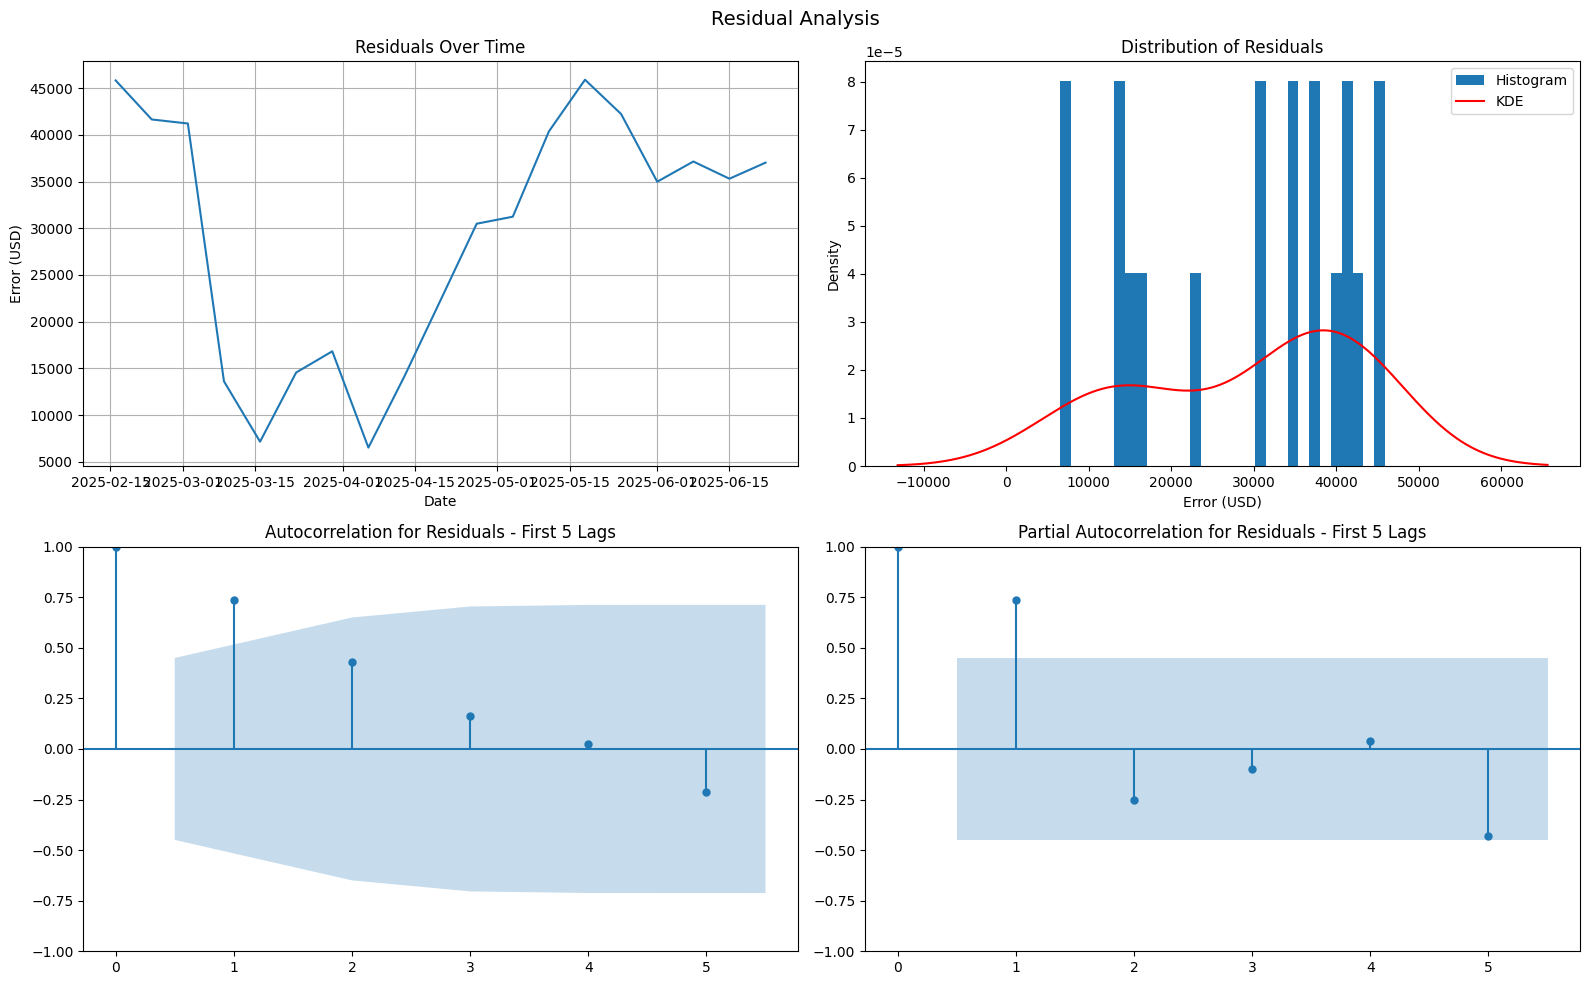

In [19]:
plot_residuals_analysis(arima_metrics, 'forecast_comparison', 5)